In [1]:
from src.ml import *

dataset = process_raw_data()
dataset = create_features(dataset)

dropping 327 duplicates
ds shape: (2955, 5)


In [2]:
dataset.head()

,headline,claps,site_id,year,site,binned-class,log-claps,clip-claps
0,Pokemon Masters Gems Hack,6.0,hacker-daily,2019,hacker-daily,0.0,1.791759,6.0
1,Pokemon Masters Gems Hack,6.0,hacker-daily,2018,hacker-daily,0.0,1.791759,6.0
2,Pokemon Masters Gems Hack,6.0,hacker-daily,2020,hacker-daily,0.0,1.791759,6.0
3,Pokemon Masters Gems Hack,6.0,hacker-daily,2015,hacker-daily,0.0,1.791759,6.0
4,Pokemon Masters Gems Hack,6.0,hacker-daily,2016,hacker-daily,0.0,1.791759,6.0


## Clap statistics

In [3]:
dataset['claps'].describe()

count      2955.000000
mean       6892.685956
std       17673.681738
min           1.000000
25%         669.000000
50%        2300.000000
75%        6600.000000
max      294000.000000
Name: claps, dtype: float64

## Distribution of claps

<AxesSubplot:ylabel='Frequency'>

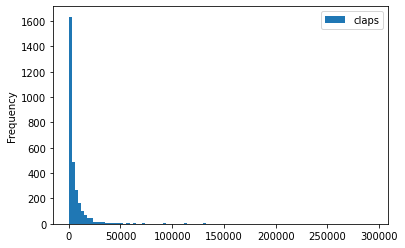

In [4]:
dataset.plot(y='claps', kind='hist', bins=100)

## Distribution of clipped claps

<AxesSubplot:ylabel='Frequency'>

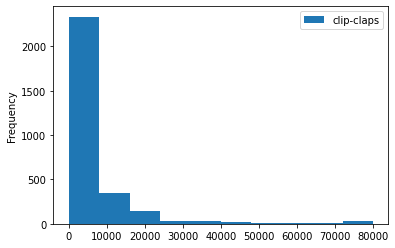

In [5]:
dataset.plot(y='clip-claps', kind='hist')

## Distribution of log claps

<AxesSubplot:ylabel='Frequency'>

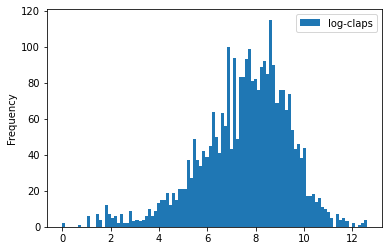

In [6]:
f, a = plt.subplots()
dataset.plot(ax=a, y='log-claps', kind='hist', bins=100)

## Binning the claps

In [7]:
target = dataset.groupby('binned-class').count().loc[:, 'headline']
target

binned-class
0.0    739
1.0    715
2.0    759
3.0    742
Name: headline, dtype: int64

<AxesSubplot:xlabel='binned-class'>

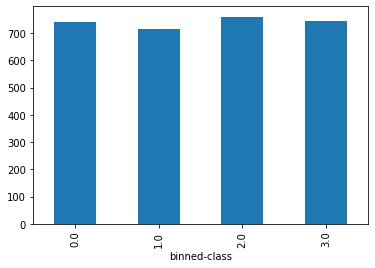

In [8]:
target.plot(kind='bar')

## How do claps change over time?

In [9]:
years = dataset.groupby('year').agg({
    'claps': ['median', 'mean'],
})

years.columns = years.columns.get_level_values(1)

years

,median,mean
year,,
2015,446.0,992.865672
2016,900.5,2470.863806
2017,2700.0,5771.651568
2018,7700.0,13880.586325
2019,3000.0,5061.528600
2020,2700.0,5767.179348


<AxesSubplot:xlabel='year'>

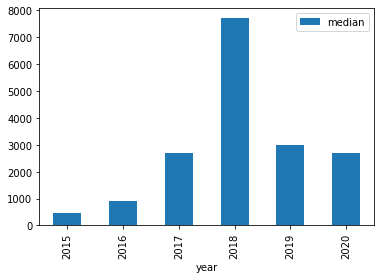

In [10]:
years.plot(kind='bar', y='median')

## Headline features

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vec = CountVectorizer()
x = vec.fit_transform(dataset['headline'])
x = x.todense()
print(x.shape)

(2955, 4333)


In [12]:
names = np.array(vec.get_feature_names())
counts = np.squeeze(np.array(x.sum(axis=0)))

In [13]:
counts[:10]

array([32,  1, 95, 15,  2,  2,  1,  1,  7,  1])

In [14]:
sort_idx = np.squeeze(np.array(counts.argsort()))

In [15]:
counts[sort_idx][-32:]

array([  87,   87,   95,   95,   96,   97,  100,  108,  108,  114,  117,
        122,  125,  132,  142,  143,  156,  158,  160,  186,  195,  202,
        231,  299,  416,  428,  454,  469,  476,  590,  940, 1133])

In [16]:
names[sort_idx][-32:]

array(['will', 'make', '10', 'be', 'should', 'it', 'are', 'people',
       'things', 'do', 'an', 'my', 'python', 'on', 'that', 'data',
       'learning', 'from', 'what', 'life', 'why', 'with', 'is', 'for',
       'your', 'in', 'of', 'and', 'you', 'how', 'the', 'to'], dtype='<U20')

In [17]:
names.shape

(4333,)